In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,title,studio,gross,theaters,opengross,opentheaters,open,close
0,Rogue One: A Star Wars Story,BV,"$532,177,324","4,157","$155,081,681","4,157",12/16,5/4
1,Finding Dory,BV,"$486,295,561","4,305","$135,060,273","4,305",6/17,12/8
2,Captain America: Civil War,BV,"$408,084,349","4,226","$179,139,142","4,226",5/6,9/22
3,The Secret Life of Pets,Uni.,"$368,384,330","4,381","$104,352,905","4,370",7/8,12/29
4,The Jungle Book (2016),BV,"$364,001,123","4,144","$103,261,464","4,028",4/15,9/29
5,Deadpool,Fox,"$363,070,709","3,856","$132,434,639","3,558",2/12,6/16
6,Zootopia,BV,"$341,268,248","3,959","$75,063,401","3,827",3/4,8/4
7,Batman v Superman: Dawn of Justice,WB,"$330,360,194","4,256","$166,007,347","4,242",3/25,6/16
8,Suicide Squad,WB,"$325,100,054","4,255","$133,682,248","4,255",8/5,11/10
9,Sing,Uni.,"$270,329,045","4,029","$35,258,145","4,022",12/21,5/4


In [5]:
df['gross'] = df['gross'].map(lambda x: x.lstrip('$'))

In [6]:
df['gross'] = df['gross'].map(lambda x: x.replace(',',''))

In [7]:
df['opengross'] = df['opengross'].astype(str).str.lstrip('$')

In [8]:
df['opengross'] = df['opengross'].map(lambda x: x.replace(',',''))

In [9]:
df['gross'].describe()

count        735
unique       735
top       112391
freq           1
Name: gross, dtype: object

In [10]:
df['gross'] = pd.to_numeric(df['gross'])

In [11]:
df['opengross'] = pd.to_numeric(df['opengross'], errors='coerce')

In [12]:
mean = df['opengross'].mean()

In [13]:
df['opengross'] = df['opengross'].fillna(mean)

In [14]:
df['theaters'] = df['theaters'].astype(str).str.replace(',','')

In [15]:
df['theaters'] = pd.to_numeric(df['theaters'], errors='coerce')

In [16]:
df['theaters'].describe()

count     734.000000
mean      658.829700
std      1207.797387
min         1.000000
25%         6.000000
50%        26.500000
75%       464.750000
max      4381.000000
Name: theaters, dtype: float64

In [17]:
df['opentheaters'] = df['opentheaters'].astype(str).str.replace(',','')

In [18]:
df['opentheaters'] = pd.to_numeric(df['opentheaters'], errors='coerce')

In [19]:
df['opentheaters'].describe()

count     687.000000
mean      612.244541
std      1215.941193
min         1.000000
25%         2.000000
50%         5.000000
75%       146.500000
max      4370.000000
Name: opentheaters, dtype: float64

In [20]:
df['opentheaters'].isnull().sum()

48

In [21]:
df['opentheaters'] = df['opentheaters'].fillna(df['opentheaters'].mean())

In [22]:
df

,title,studio,gross,theaters,opengross,opentheaters,open,close
0,Rogue One: A Star Wars Story,BV,532177324,4157.0,1.550817e+08,4157.000000,12/16,5/4
1,Finding Dory,BV,486295561,4305.0,1.350603e+08,4305.000000,6/17,12/8
2,Captain America: Civil War,BV,408084349,4226.0,1.791391e+08,4226.000000,5/6,9/22
3,The Secret Life of Pets,Uni.,368384330,4381.0,1.043529e+08,4370.000000,7/8,12/29
4,The Jungle Book (2016),BV,364001123,4144.0,1.032615e+08,4028.000000,4/15,9/29
5,Deadpool,Fox,363070709,3856.0,1.324346e+08,3558.000000,2/12,6/16
6,Zootopia,BV,341268248,3959.0,7.506340e+07,3827.000000,3/4,8/4
7,Batman v Superman: Dawn of Justice,WB,330360194,4256.0,1.660073e+08,4242.000000,3/25,6/16
8,Suicide Squad,WB,325100054,4255.0,1.336822e+08,4255.000000,8/5,11/10
9,Sing,Uni.,270329045,4029.0,3.525814e+07,4022.000000,12/21,5/4


In [23]:
df.describe()

,gross,theaters,opengross,opentheaters
count,7.350000e+02,734.000000,7.350000e+02,735.000000
mean,1.546892e+07,658.829700,5.139972e+06,612.244541
std,5.240569e+07,1207.797387,1.720176e+07,1175.510734
min,2.520000e+02,1.000000,2.400000e+01,1.000000
25%,2.466400e+04,6.000000,7.132000e+03,2.000000
50%,1.301520e+05,26.500000,3.641500e+04,9.000000
75%,3.064058e+06,464.750000,2.701644e+06,612.244541
max,5.321773e+08,4381.000000,1.791391e+08,4370.000000


In [24]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import statsmodels as sm
import statsmodels.formula.api as sm
from sklearn import linear_model

/Users/akhilmaddu/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


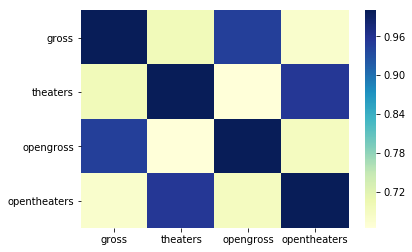

In [25]:
import seaborn as sn
correlation_data = df.corr()
sn.heatmap(correlation_data,cmap="YlGnBu")
plt.show()

In [62]:
df

(735, 8)

In [27]:
#target=df['gross']
#target1=df[]
#X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.30)

In [31]:
months=[]
a=df['open'].tolist()
for i  in a:
    l=i.split('/')
    months.append(l[0])

In [33]:
df['months']=months

In [34]:
df.head()

,title,studio,gross,theaters,opengross,opentheaters,open,close,months
0,Rogue One: A Star Wars Story,BV,532177324,4157.0,155081681.0,4157.0,12/16,5/4,12
1,Finding Dory,BV,486295561,4305.0,135060273.0,4305.0,6/17,12/8,6
2,Captain America: Civil War,BV,408084349,4226.0,179139142.0,4226.0,5/6,9/22,5
3,The Secret Life of Pets,Uni.,368384330,4381.0,104352905.0,4370.0,7/8,12/29,7
4,The Jungle Book (2016),BV,364001123,4144.0,103261464.0,4028.0,4/15,9/29,4


In [35]:
target=df['gross']
target_list=df['gross'].tolist()

In [36]:
del df['open']
del df['close']
del df['gross']
del df['opengross']

In [37]:
df.head()

,title,studio,theaters,opentheaters,months
0,Rogue One: A Star Wars Story,BV,4157.0,4157.0,12
1,Finding Dory,BV,4305.0,4305.0,6
2,Captain America: Civil War,BV,4226.0,4226.0,5
3,The Secret Life of Pets,Uni.,4381.0,4370.0,7
4,The Jungle Book (2016),BV,4144.0,4028.0,4


In [46]:
df_dummies=pd.get_dummies(df['studio'])

In [47]:
df_new=pd.concat([df,df_dummies],axis=1)

In [48]:
df_new.head()

,title,studio,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,...,WB (NL),WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.
0,Rogue One: A Star Wars Story,BV,4157.0,4157.0,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Finding Dory,BV,4305.0,4305.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Captain America: Civil War,BV,4226.0,4226.0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Secret Life of Pets,Uni.,4381.0,4370.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Jungle Book (2016),BV,4144.0,4028.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new, target, test_size=0.30)

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [61]:
len(df_new)
len(target)

735

In [69]:
lr=LinearRegression()

In [73]:
del df_new['studio']
del df_new['title']

In [74]:
df_new.head()

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WB (NL),WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.
0,4157.0,4157.0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4305.0,4305.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4226.0,4226.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4381.0,4370.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4144.0,4028.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_new['rank']=np.arange(735)

In [79]:
df_new.head()

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
0,4157.0,4157.0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4305.0,4305.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4226.0,4226.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,4381.0,4370.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4144.0,4028.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [170]:
#X_train, X_test, Y_train, Y_test = train_test_split(df_new, target, test_size=0.30)
#x=lr.fit(X_train, Y_train,)

In [94]:
for column in df_new.columns.tolist():
    df_new[column].values.astype(np.int64)
    

In [100]:
df_new.head()

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
0,4157.0,4157.0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4305.0,4305.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4226.0,4226.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,4381.0,4370.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4144.0,4028.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [105]:
df_new[df_new.isnull().any(axis=1)]

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
295,NaN,612.244541,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,295


In [109]:
df_new.fillna(0)

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
0,4157.0,4157.000000,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4305.0,4305.000000,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4226.0,4226.000000,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,4381.0,4370.000000,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4144.0,4028.000000,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,3856.0,3558.000000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,3959.0,3827.000000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,4256.0,4242.000000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,4255.0,4255.000000,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,4029.0,4022.000000,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [110]:
df_new[df_new.isnull().any(axis=1)]

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
295,NaN,612.244541,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,295


In [112]:
df['theaters'].fillna(0,inplace=True)

In [114]:
df_new[df_new.isnull().any(axis=1)]

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
295,NaN,612.244541,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,295


In [117]:
df_new.drop(df_new.index[[295]], inplace=True)

In [123]:
df_new[290:300]

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
290,44.0,1.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,290
291,71.0,3.000000,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,291
292,78.0,78.000000,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,292
293,39.0,38.000000,11,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,293
294,40.0,3.000000,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,294
296,100.0,100.000000,10,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,296
297,22.0,3.000000,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,297
298,20.0,20.000000,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,298
299,15.0,612.244541,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,299
300,27.0,20.000000,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,300


In [129]:
for column in df_new.columns.tolist():
    df_new[column].values.astype(np.float64)
    

In [137]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 734
Columns: 163 entries, theaters to rank
dtypes: float64(2), int64(1), object(1), uint8(159)
memory usage: 162.6+ KB


In [138]:
df_new.head()

,theaters,opentheaters,months,25th Frame,26 Aries,5&2,A23,A24,AAE,AD,...,WGUSA,WOW,WRA,Wein.,Wonder,YFG,Yash,Zee,Zeit.,rank
0,4157.0,4157.0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4305.0,4305.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4226.0,4226.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,4381.0,4370.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4144.0,4028.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [139]:
akhil=df_new['theaters'].astype(np.int64)

In [153]:
pd.to_numeric(df_new['theaters'],errors='coerce')
pd.to_numeric(df_new['opentheaters'],errors='coerce')



0      4157.000000
1      4305.000000
2      4226.000000
3      4370.000000
4      4028.000000
5      3558.000000
6      3827.000000
7      4242.000000
8      4255.000000
9      4022.000000
10     3875.000000
11     4144.000000
12     3882.000000
13       25.000000
14     4026.000000
15     3928.000000
16     4150.000000
17     4060.000000
18        5.000000
19     3955.000000
20     3963.000000
21     3508.000000
22     3561.000000
23     3525.000000
24     3215.000000
25     3932.000000
26     4130.000000
27     3343.000000
28     2317.000000
29     3478.000000
          ...     
705       1.000000
706       2.000000
707       3.000000
708       1.000000
709       2.000000
710       1.000000
711       1.000000
712       1.000000
713       1.000000
714     612.244541
715       1.000000
716       2.000000
717       1.000000
718       1.000000
719       2.000000
720       3.000000
721      27.000000
722      10.000000
723       1.000000
724       2.000000
725       1.000000
726       2.

In [154]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 734
Columns: 163 entries, theaters to rank
dtypes: float64(2), int64(1), object(1), uint8(159)
memory usage: 162.6+ KB


In [160]:
#target.remove(295)
#X_train, X_test, Y_train, Y_test = train_test_split(df_new, target, test_size=0.30)
len(target)
len(df_new)

734

In [166]:
p=target.tolist()

In [167]:
p.remove(421986)

In [168]:
len(p)

734

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new, p, test_size=0.30)

In [187]:
x=lr.fit(X_train, Y_train)
print(X_train)

     theaters  opentheaters months  25th Frame  26 Aries  5&2  A23  A24  AAE  \
138    3015.0   3015.000000      4           0         0    0    0    0    0   
453       9.0      2.000000      6           0         0    0    0    0    0   
1      4305.0   4305.000000      6           0         0    0    0    0    0   
77     2915.0   2915.000000      2           0         0    0    0    0    0   
329      84.0      2.000000     10           0         0    0    0    0    0   
507       4.0      4.000000      9           0         0    0    0    0    0   
502      17.0      1.000000      7           0         0    0    0    0    0   
71     3008.0   2982.000000      7           0         0    0    0    0    0   
61     3210.0   3210.000000     12           0         0    0    0    0    0   
631       1.0      1.000000      8           0         0    0    0    0    0   
367      14.0    612.244541      1           0         0    0    0    0    0   
679       1.0      1.000000      9      

In [188]:
pred_1=x.predict(X_train)
pred_2=x.predict(X_test)

In [189]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_train=sqrt(mean_squared_error(Y_train,pred_1))
rms_test=sqrt(mean_squared_error(Y_test,pred_2))

In [190]:
rms_train

30258062.368679825

In [185]:
rms_test

1893641986030367.5